<a href="https://colab.research.google.com/github/AbidMorshed/CAES-system/blob/main/1_Compressor_2Turbine_CAES_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyromat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyromat: filename=PYroMat-2.2.4-py3-none-any.whl size=1009765 sha256=abbefc938ef456ccf7dfd4a67ea21e78ac65bcadcb8459fdba15027b9ef7d60d
  Stored in directory: /root/.cache/pip/wheels/ac/a6/c0/a9ccb2f23445c0a49467f88368ea611126b22011c53a91ee51
Successfully built pyromat


In [2]:
import pyromat as pm 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
air=pm.get('ig.air')
pm.config
Ta=273
L=[6.5,31,61,110]
P_drop=[0.0005*item for item in L]
P_drop

[0.0032500000000000003, 0.0155, 0.0305, 0.055]

In [4]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

###**Compressor Function**

In [5]:
#rc=compression ratio 
#T_in=inlet temperature  
#P_in=inlet pressure 
def compressor (T_in,P_in,rc):
  T_in=T_in+273
  gamma=(air.cp(T_in,P_in)/air.cv(T_in,P_in))
  n_pol=0.91-((rc-1)/300)  #n_pol=polytropic index
  n=gamma*n_pol/(gamma*n_pol-gamma+1)                
  P_out=rc*P_in
  T_out=T_in*pow(rc,((n-1)/n))
  h_in=air.h(T_in,P_in)
  h_out=air.h(T_out,P_out)
  s_in=air.s(T_in,P_in)
  s_out=air.s(T_out,P_out)
  wc=h_out-h_in
  ed=-Ta*(s_in-s_out)
  T_out=T_out-273
  return T_out, P_out, wc, ed
  print('Outlet temperature is %0.3f \nOutlet Pressure is %0.3f \nwork output= %0.3f \nexergy destruction is %0.3f'%(T_out,P_out,wc,ed))

##**Turbine Function**

In [6]:
def turbine (T_in,P_in,rt):
  T_in=T_in+273
  gamma=(air.cp(T_in,P_in)/air.cv(T_in,P_in))
  n_pol=0.90-(rt-1)/250
  P_out=P_in/rt
  n=1/(1-((n_pol*(gamma-1))/gamma))
  T_out=T_in/(pow(rt,((n-1)/n)))
  h_in=air.h(T_in,P_in)
  h_out=air.h(T_out,P_out)
  s_in=air.s(T_in,P_in)
  s_out=air.s(T_out,P_out)
  wt=h_in-h_out
  ed=-Ta*(s_in-s_out)
  T_out=T_out-273
  return T_out, P_out, wt, ed
  print('Outlet temperature is %0.3f \nOutlet Pressure is %0.3f \nwork output= %0.3f \nexergy destruction is %0.3f'%(T_out,P_out,wt,ed))

###**Point 1-9 (Compressor)**

In [7]:
rc=[6,4.5]
rt=[1.54,2.22]
#compressor 1
#point 1
Tc1,Pc1=[25,1.013]
#compressor 1 outlet
#point 2 
Tc2, Pc2, wc1, ex_dc1=compressor (Tc1,Pc1,rc[0])
#compressor 2 inlet (assumed)
#point 3
Tc3,Pc3=[68.08,Pc2-Pc2*P_drop[0]]

#Exergy destruction in pcm
#table
dfc=pd.DataFrame()
for i in range (1,4):
  dfc.loc[i,['point','Temperature','Pressure']]=i,globals()['Tc'+str(i)],globals()['Pc'+str(i)]

display(dfc)
dfwc=pd.DataFrame()
for i in range (1,2):
  dfwc.loc[i,['Compressor no','Work done','Exergy Destruction']]=i,globals()['wc'+str(i)],globals()['ex_dc'+str(i)]
display(dfwc)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,point,Temperature,Pressure
1,1.0,25.000000,1.013000
2,2.0,255.545841,6.078000
3,3.0,68.080000,6.058246


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,Compressor no,Work done,Exergy Destruction
1,1.0,234.536493,18.5097


ValueError: ignored

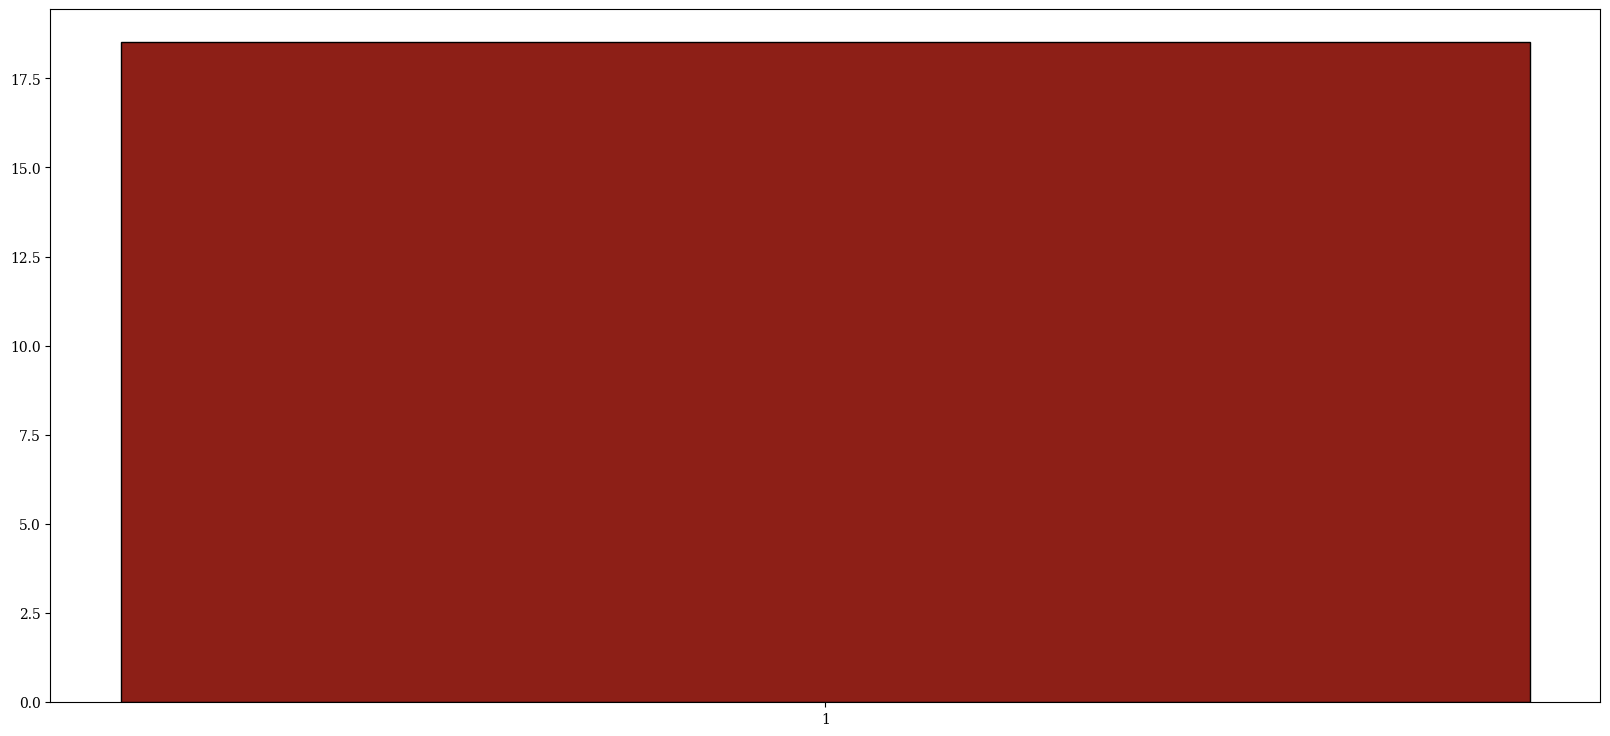

In [8]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwc['Compressor no'], height=dfwc['Exergy Destruction'],color='#8d1f17',edgecolor='black',width=0.5 )
# plt.title('Exergy Destruction of Compressor',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwc['Compressor no'])
ax1.set_xticklabels(['Compressor stage 1'],fontsize=18)

plt.xlabel('No. of Compressor Stages',fontsize=18,labelpad=20)
plt.ylabel('Exergy Destruction (kW)',fontsize=18, labelpad=20)
plt.savefig('/content/Figure/Exergy Destruction of Compressor.jpg')

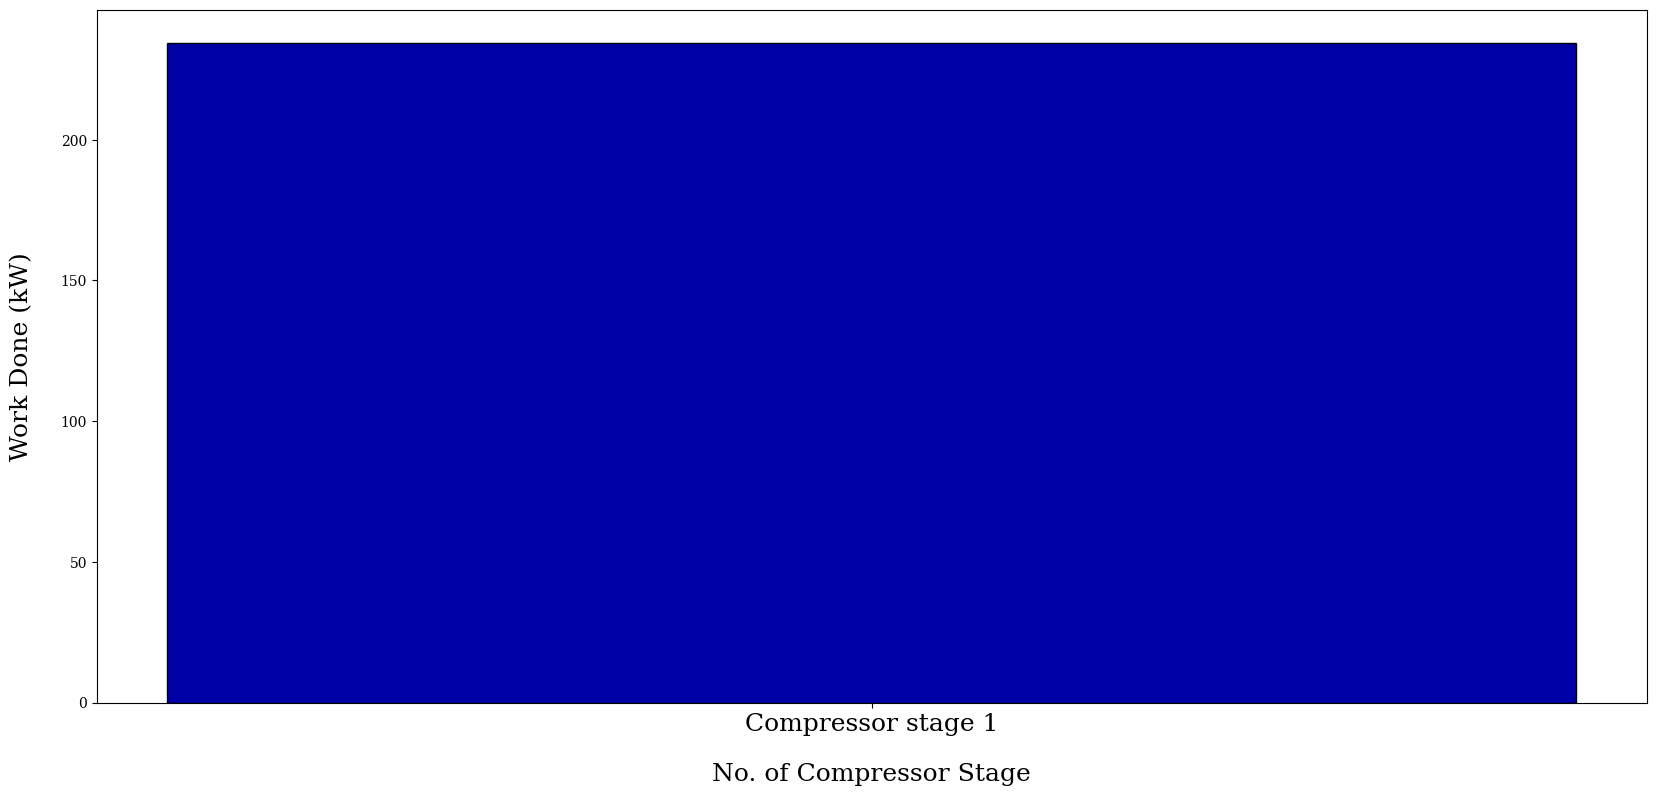

In [10]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwc['Compressor no'], height=dfwc['Work done'],color='#0000a7',edgecolor='black',width=0.5 )
# plt.title('Work Done by Compressor',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwc['Compressor no'])
ax1.set_xticklabels(['Compressor stage 1'],fontsize=18)

plt.xlabel('No. of Compressor Stage',fontsize=18,labelpad=20)
plt.ylabel('Work Done (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Work Done of Compressor.jpg')

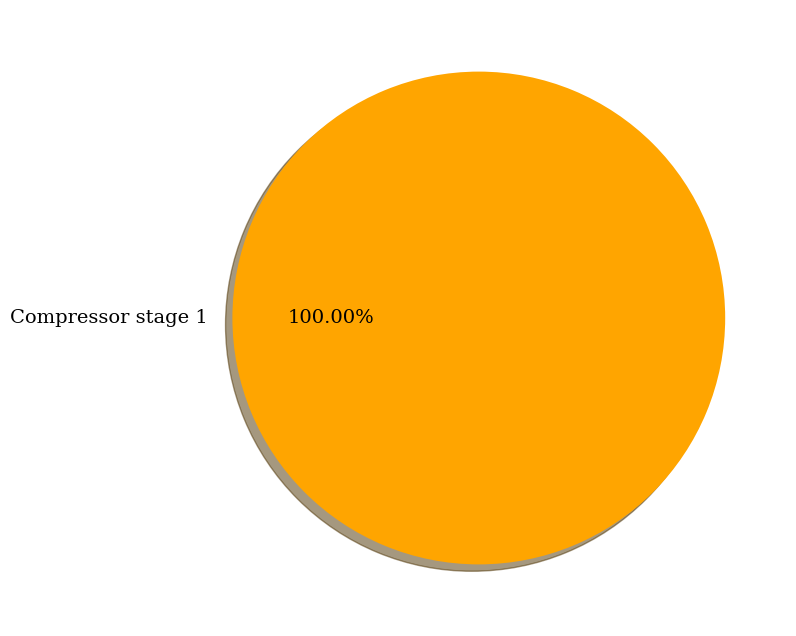

In [13]:
plt.figure(figsize=(8,8))
plt.pie(dfwc['Exergy Destruction'], autopct='%0.2f%%', labels=['Compressor stage 1'], colors=['orange','lime','purple','green'], textprops={'fontsize':14},shadow=True  ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Compressor Pie.png')
plt.show()

###**Point 10-12(Cavern & Throttle Valve)**

In [14]:
#Cavern
T4,P4=[Tc3,0.99*Pc3]

#cavern outlet
h_cavern=air.h(T4+273,P4)
h_cavern_outlet=.95*h_cavern[0]

T_outlet=T4+(h_cavern_outlet-h_cavern)/air.cp(T4+273)  #delh=m Cp delT

T5,P5=[T_outlet,P4*0.99]

#Throttle valve
#point 8
h5=air.h(T5+273,P5)
P6=P5*0.5
T6=air.p(h=h5,p=P6)
T6,P6=[T6,P6]

#Exergy destruction of Throttle Valve
ex_dth=(air.s(T6+273,P6)-air.s(T5+273,P5))*Ta
display(ex_dth)
dfcv=pd.DataFrame()
for i in range (4,7):
  dfcv.loc[i,['point','Temperature','Pressure']]=i,globals()['T'+str(i)],globals()['P'+str(i)]
dfcv

array([-2.26133852])

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,point,Temperature,Pressure
4,4.0,68.080000,5.997664
5,5.0,66.148678,5.937687
6,6.0,2.968844,2.968844


###**Point 12-21 (Turbine)**

In [15]:
rc=[6,4.5,2.5]
rt=[1.54,2.22,2.7]
#turbine 1
#point 6
Tt6,Pt6=[T6,P6]
#turbine 1 outlet
#point 7 
Tt7, Pt7, wt1, ex_dt1=turbine (Tt6,Pt6,rt[0])
#turbine 2 inlet (assumed)
#point 8
Tt8,Pt8=[100.67,Pt7-Pt7*P_drop[0]]
#turbine 2 outlet
#point 9
Tt9, Pt9, wt2, ex_dt2=turbine (Tt8,Pt8,rt[1])



#table
dft=pd.DataFrame()
for i in range (7,10):
  dft.loc[i,['point','Temperature','Pressure']]=i,globals()['Tt'+str(i)],globals()['Pt'+str(i)]

display(dft)
dfwt=pd.DataFrame()
for i in range (1,3):
  dfwt.loc[i,['Turbine no','Work done','Exergy Destruction']]=i,globals()['wt'+str(i)],globals()['ex_dt'+str(i)]
dfwt

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,point,Temperature,Pressure
7,7.0,-25.993727,1.927821
8,8.0,100.670000,1.921555
9,9.0,32.117378,0.865565


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,Turbine no,Work done,Exergy Destruction
1,1.0,29.056092,3.470605
2,2.0,69.088370,6.739357


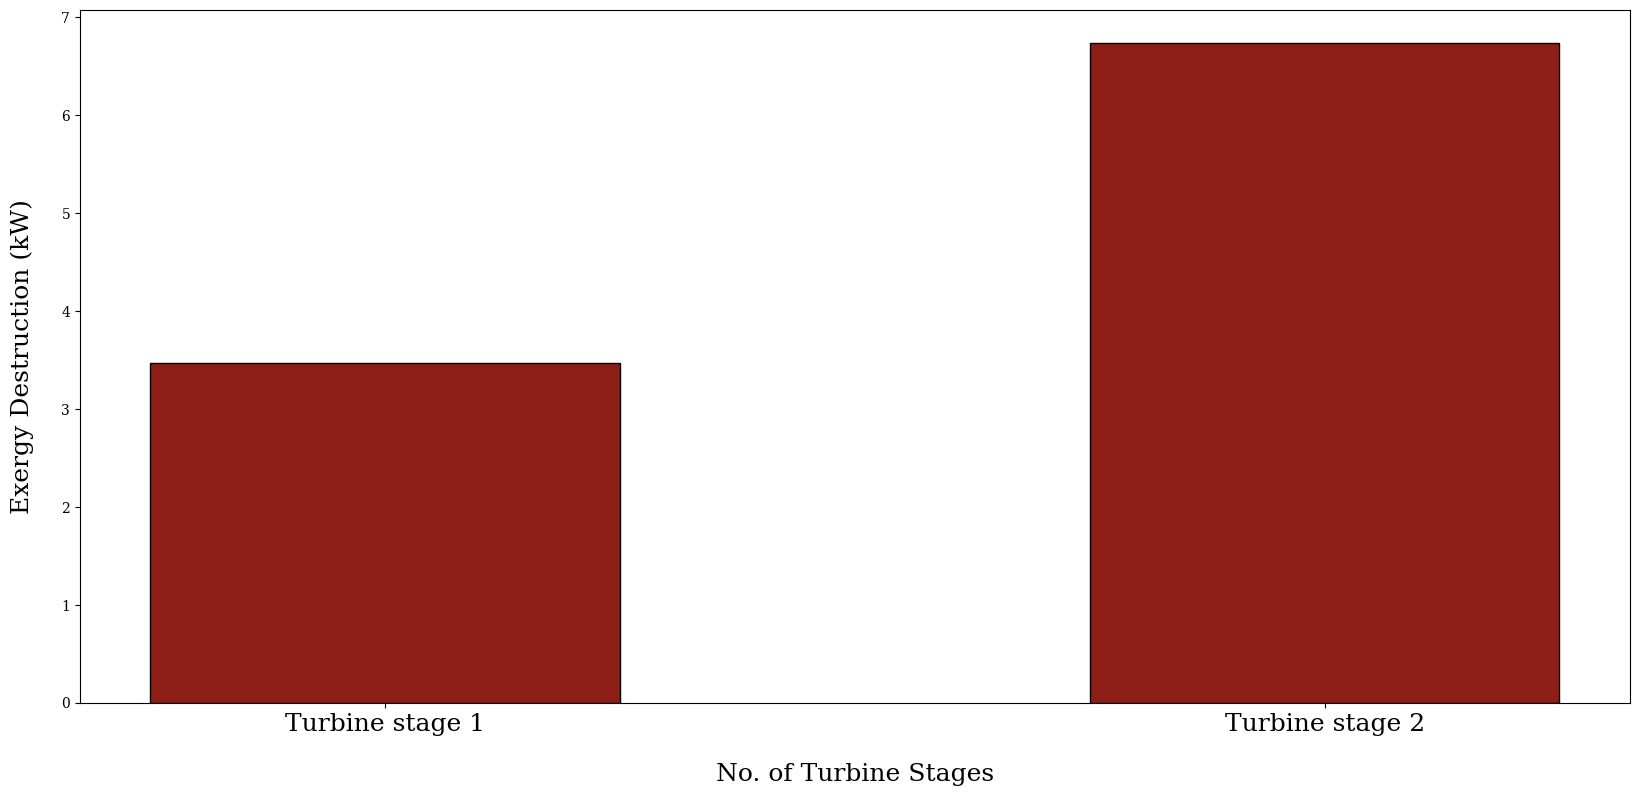

In [17]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwt['Turbine no'], height=dfwt['Exergy Destruction'],color='#8d1f17',edgecolor='black',width=0.5 )
# plt.title('Exergy Destruction of Turbine',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwt['Turbine no'])
ax1.set_xticklabels(['Turbine stage 1','Turbine stage 2'],fontsize=18)

plt.xlabel('No. of Turbine Stages',fontsize=18,labelpad=20)
plt.ylabel('Exergy Destruction (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Exergy Destruction of Turbine.jpg')

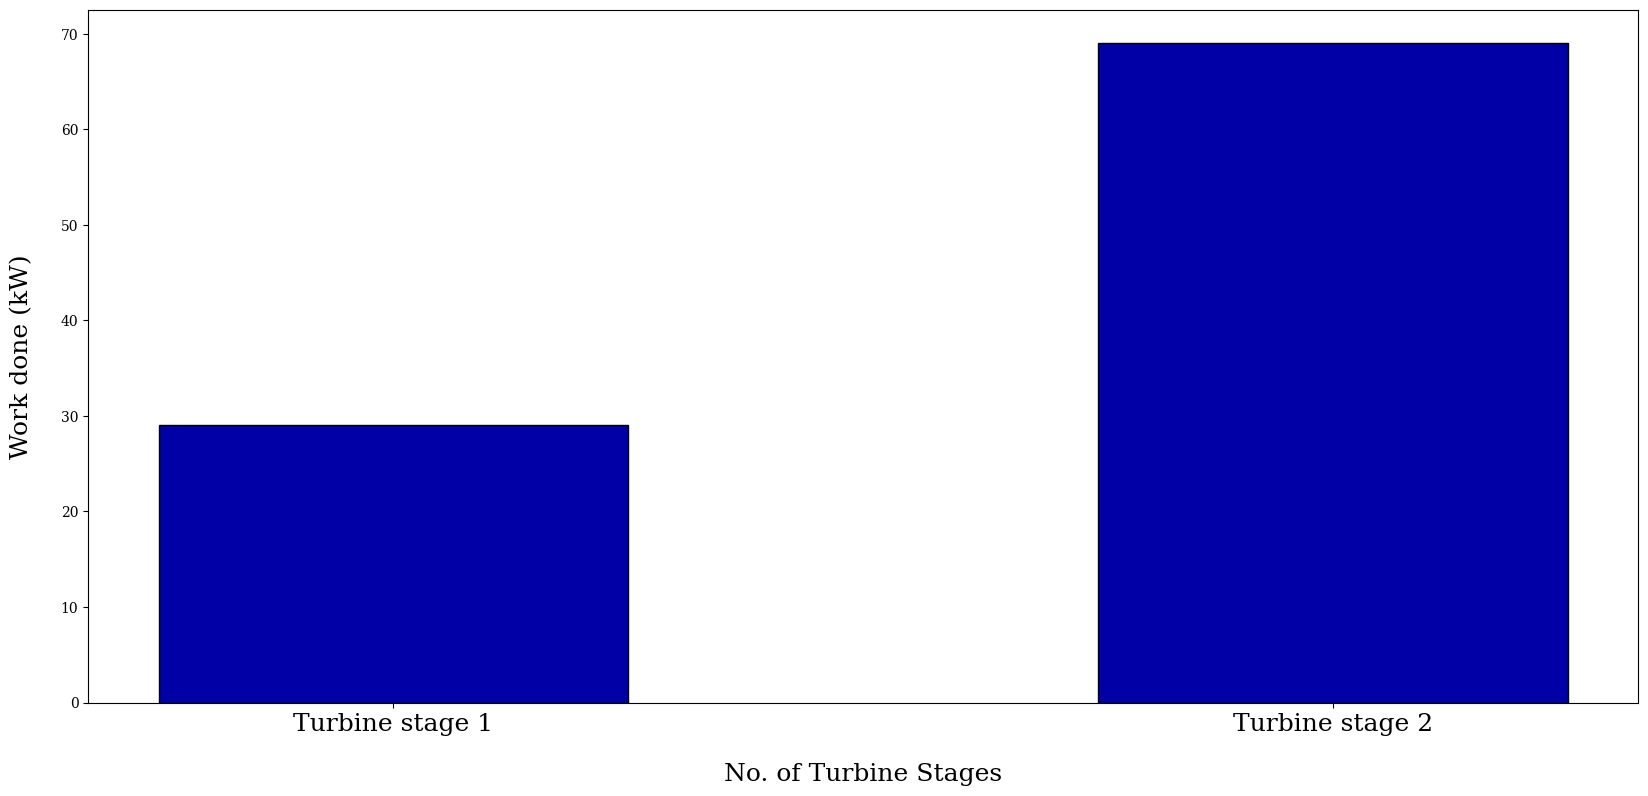

In [18]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwt['Turbine no'], height=dfwt['Work done'],color='#0000a7',edgecolor='black',width=0.5 )
# plt.title('Work done of Turbine',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwt['Turbine no'])
ax1.set_xticklabels(['Turbine stage 1','Turbine stage 2'],fontsize=18)

plt.xlabel('No. of Turbine Stages',fontsize=18,labelpad=20)
plt.ylabel('Work done (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Work Done of Turbine.jpg')

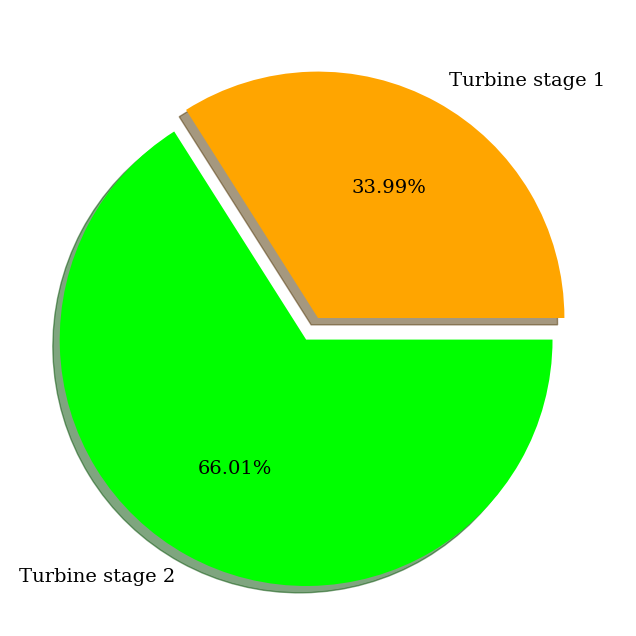

In [19]:
plt.figure(figsize=(8,8))
plt.pie(dfwt['Exergy Destruction'], autopct='%0.2f%%', explode=(0,0.1), labels=['Turbine stage 1','Turbine stage 2'], colors=['orange','lime','purple','green','red'],shadow=True, textprops={'fontsize':14}  ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Turbine Pie.png')
plt.show()

###**All Point Plot and Table**

In [20]:
#PCM exergy destruction
pcm=pd.DataFrame()
pcm1=air.h(Tc2+273,Pc2)-air.h(Tc3+273,Pc3)-Ta*(air.s(Tc2+273,Pc2)-air.s(Tc3+273,Pc3))-(air.h(Tt8+273,Pt8)-air.h(Tt7+273,Pt7)-Ta*(air.s(Tt8+273,Pt8)-air.s(Tt7+273,Pt7)))



In [21]:
#Efficiency
Efficiency=(dfwt['Work done'].sum(axis=0)/dfwc['Work done'].sum(axis=0))*100
Efficiency

41.84613678460959

In [23]:
exergy_compressor=sum(dfwc['Exergy Destruction'])
exergy_turbine=sum(dfwt['Exergy Destruction'])
exergy_pcm=pcm1[0]
exergy_throttle=ex_dth[0]

In [24]:
Loss=100-Efficiency
total_exergy=exergy_compressor+exergy_turbine+exergy_pcm+exergy_throttle
System_ed=(total_exergy/Loss)*Efficiency
System_ed

59.40800085526553

In [25]:
name=[['Compressor'],['Turbine'],['TES'],['Throttle Valve'],['System']]
exergy_total=pd.DataFrame([exergy_compressor,exergy_turbine,exergy_pcm,exergy_throttle,System_ed])
exergy_total=pd.concat([pd.DataFrame(name),exergy_total],axis=1)
exergy_total.columns=['Component','Exergy']
exergy_total

,Component,Exergy
0,Compressor,18.509700
1,Turbine,10.209962
2,TES,56.101384
3,Throttle Valve,-2.261339
4,System,59.408001


ValueError: ignored

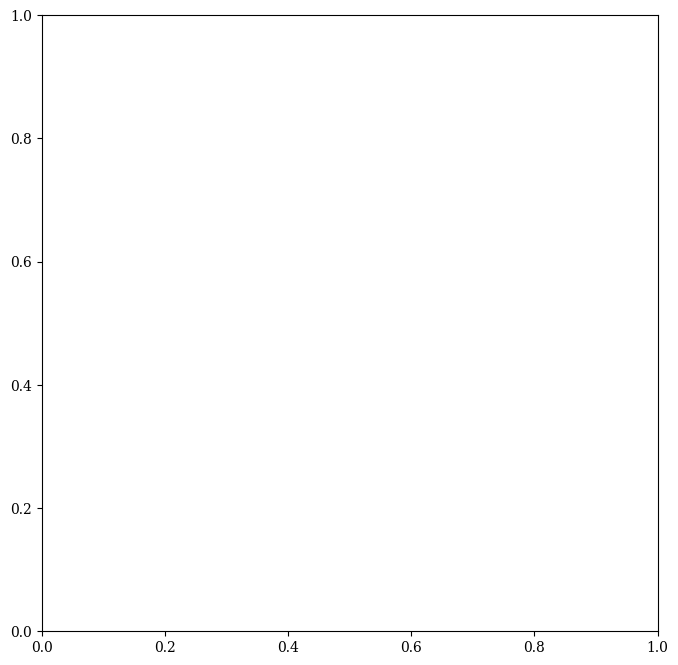

In [26]:
plt.figure(figsize=(8,8))
plt.pie(exergy_total['Exergy'], autopct='%0.2f%%', explode=(0,0,0,0.2,0.1), labels=['Compressor','Turbine','TES','Throttle Valve','System'], colors=['coral','brown','dodgerblue','green','mediumvioletred'],textprops={'fontsize':14},shadow=True ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Components Pie.png')
plt.show()

In [ ]:
df_total = pd.concat([dfc, dfcv, dft], ignore_index=True, sort=False)
df_total

,point,Temperature,Pressure
0,1.0,25.000000,1.013000
1,2.0,255.545841,6.078000
2,3.0,68.080000,6.077350
3,4.0,276.494436,27.348075
4,5.0,67.130000,27.347425
5,6.0,180.833310,68.368562
6,7.0,68.520000,68.367912
7,8.0,68.520000,64.949517
8,9.0,64.613505,120.824000
9,10.0,58.900000,60.410000


In [ ]:
df_total.to_csv("/content/Figure/Table of Temperature and Pressure.csv")

**Zipping folder and Download**

In [ ]:
!zip -r /content/file.zip /content/Figure

  adding: content/Figure/ (stored 0%)
  adding: content/Figure/Work Done of Turbine.jpg (deflated 68%)
  adding: content/Figure/Work Done of Compressor.jpg (deflated 70%)
  adding: content/Figure/Exergy Destruction of Components Pie.png (deflated 5%)
  adding: content/Figure/Table of Temperature and Pressure.csv (deflated 50%)
  adding: content/Figure/Exergy Destruction of Compressor Pie.png (deflated 9%)
  adding: content/Figure/Exergy Destruction of Turbine.jpg (deflated 68%)
  adding: content/Figure/Exergy Destruction of Turbine Pie.png (deflated 8%)
  adding: content/Figure/Exergy Destruction of Compressor.jpg (deflated 67%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>